In [1]:
import numpy as np
import pandas as pd
import scipy.misc as sp
import json

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#steering -1..1
#throttle 0..1
#brake 0
#speed up to 30


In [4]:
df = pd.read_csv('driving_log.csv', header=None, names=['cimage','limage','rimage','steering','throttle','brake','speed'])

In [5]:
len(df)

8036

In [6]:
df

,cimage,limage,rimage,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [7]:
cimage_names = list(df['cimage'])
steering = np.array(df['steering'])
len(steering)

8036

In [8]:
# look at steering angles

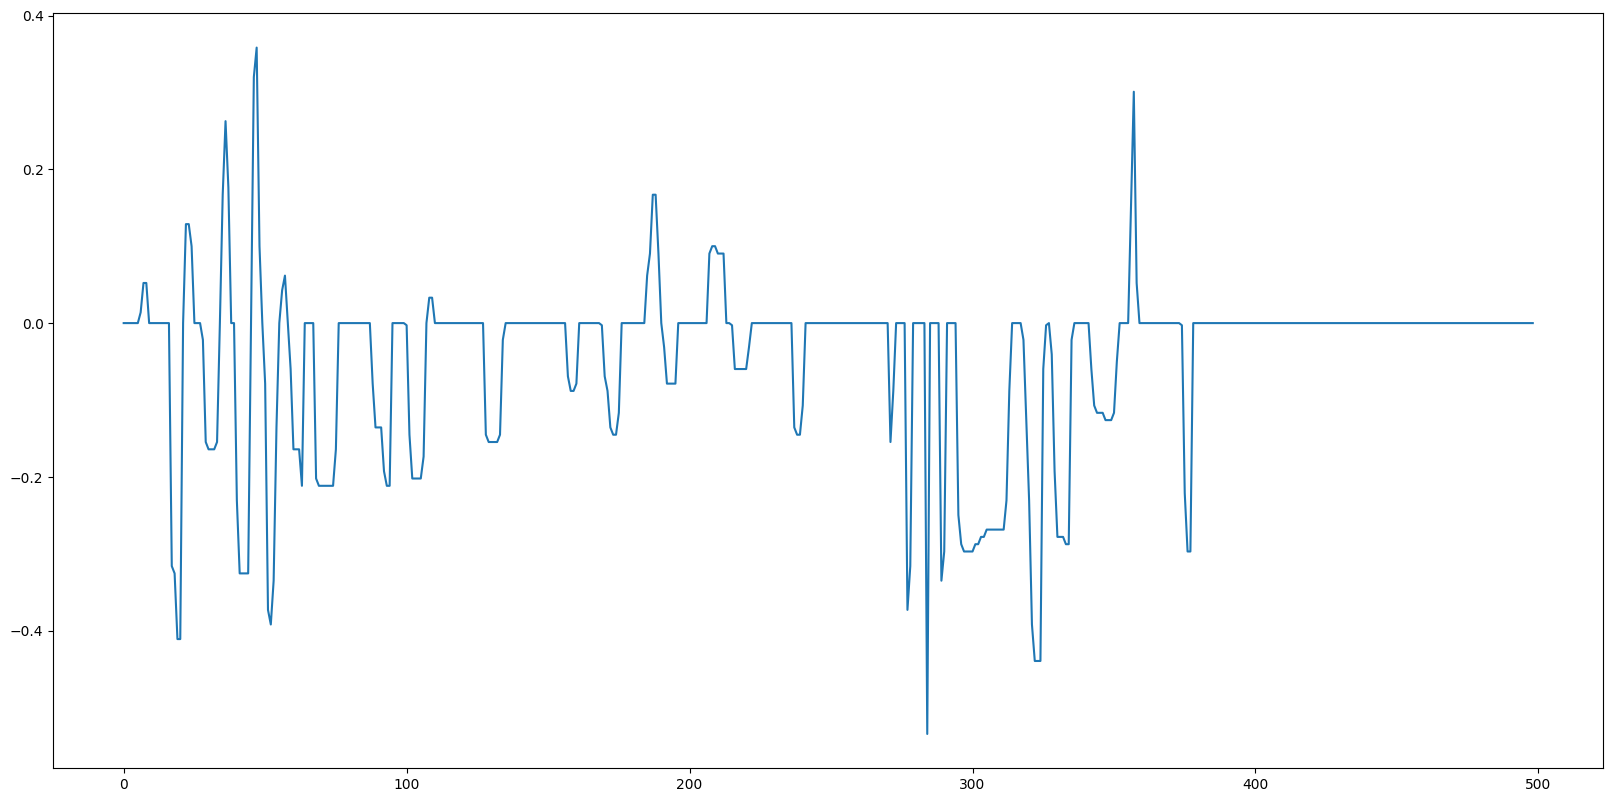

In [9]:
plt.plot(steering[-500:-1]);

In [10]:
# load image files

In [11]:
interp = 'cubic'
cimages = np.stack( [sp.imresize(sp.imread(file, mode='RGB'), size=(80,160), interp=interp) for file in cimage_names], axis=0 )

In [12]:
cimages.shape

(8036, 80, 160, 3)

In [13]:
# resize images

In [14]:
#interp = 'cubic'
#cimages_resized = np.stack( [sp.imresize(image, size=(80,160), interp=interp) for image in cimages], axis=0 )
#cimages_resized.shape

In [15]:
#limages_resized = np.stack( [sp.imresize(image, size=(80,160), interp=interp) for image in limages], axis=0 )

In [16]:
#rimages_resized = np.stack( [sp.imresize(image, size=(80,160), interp=interp) for image in rimages], axis=0 )

In [17]:
def show_images(images, labels_true, rows, cols, cls=None, random=True, labels_predicted=None):
    fig, axes = plt.subplots(rows, cols)
    fig.subplots_adjust(hspace=0.37, wspace=0.3)
    imidx = 0
    for i, ax in enumerate(axes.flat):
        while True:
            if random:
                example = np.random.randint(0, len(images))
            else:
                example = imidx
                imidx += 1
            if cls is None or labels_true[example]==cls:
                break
        if example >= len(images):
            return
        if len(images.shape)==4:
            ax.imshow(images[example,:,:,:]);
        else:
            ax.imshow(images[example,:,:], cmap='Greys_r');
        ax.set_xticks([])
        ax.set_yticks([])
        if labels_predicted is not None:
            str = '{}: true {} pred {}'.format(example, labels_true[example], labels_predicted[example])
        else:
            str = '{}: true {}'.format(example, labels_true[example])
        ax.set_xlabel(str)

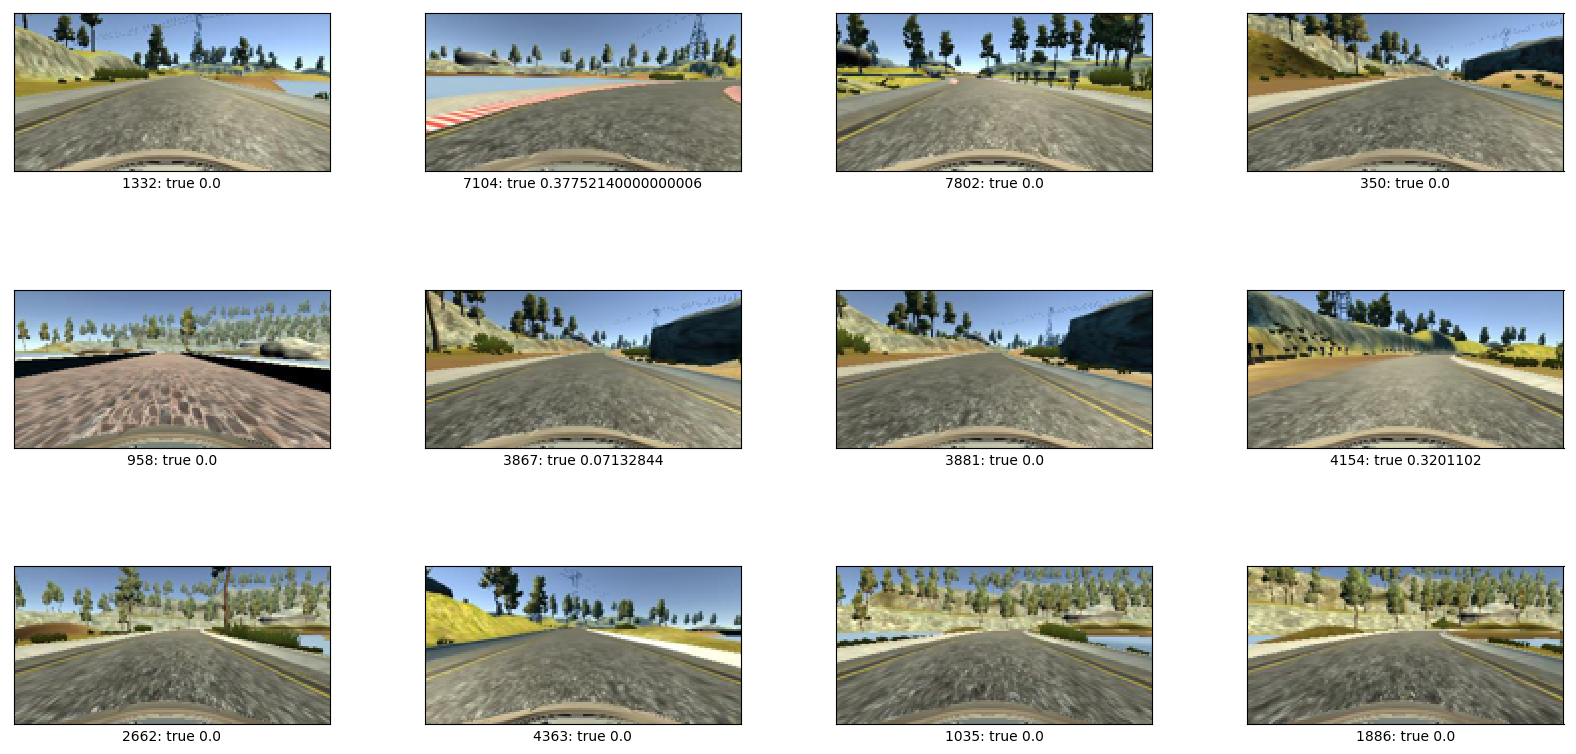

In [18]:
# show 12 random images and their steering angles
show_images(cimages, steering, 3, 4)

In [19]:
adjustment = 3.0/25. # should be 4 degrees
#image_steering = np.hstack([steering, steering[idx]+adjustment, steering[idx]-adjustment])
#image_steering = steering
#image_steering = np.hstack([steering, -steering, steering+adjustment, steering-adjustment, -(steering+adjustment),-(steering-adjustment)])
#image_steering.shape

In [20]:
# apply a mask

In [21]:
shape = (None, 80, 160, 3)
mask = np.zeros(shape[1:])
mask[0:27,:,:] = 0
mask[27:65,:,:] = 1
mask[65:,:,:] = 0
mask.shape

(80, 160, 3)

In [22]:
# APPLY MASK
cimages = np.multiply(cimages,mask).astype(np.uint8)

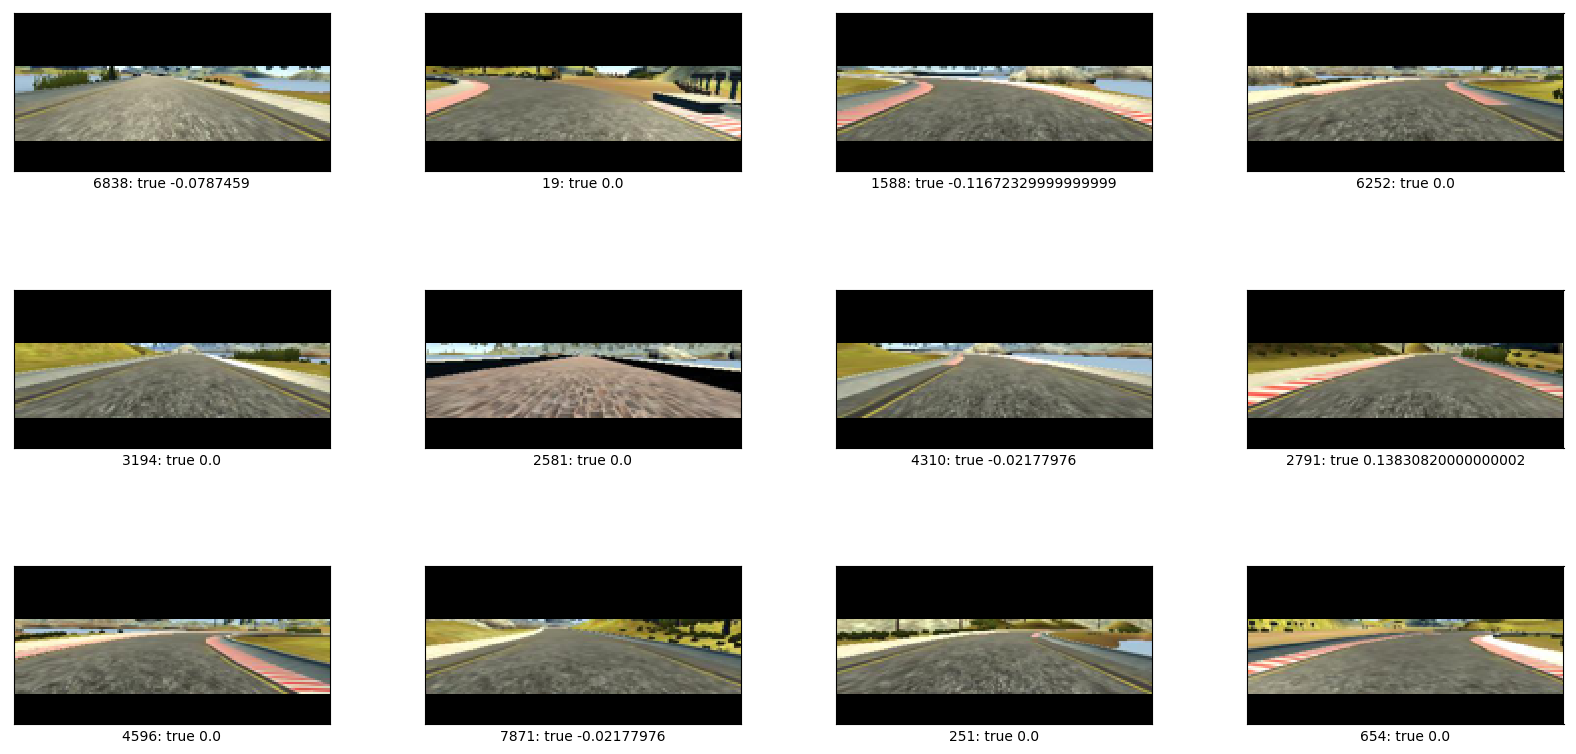

In [23]:
show_images(cimages, steering, 3, 4, random=True)

In [24]:
import cv2

In [25]:
shape[1:3]

(80, 160)

In [26]:
def trans_image(image, steer, trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(shape[2], shape[1]))
    return image_tr,steer_ang

def train_Generator(batch_size=64):
    n = len(cimage_names)
    shape = (batch_size,)+cimages.shape[1:]
    images = np.zeros(shape, dtype=np.uint8)
    image_steering = np.zeros(batch_size)
    while 1:
        perm = np.random.permutation(range(len(cimage_names)))
        current_batch_cnt = 0
        for i in perm: 
#            print ('i = ', i)
            # fliped images from another part of the set
            j = perm[n-1-i]
#            cimage = np.multiply(sp.imread(cimage_names[i], mode='RGB'), mask).astype(np.uint8)
#            limage = np.multiply(sp.imread(limage_names[i], mode='RGB'), mask).astype(np.uint8)
#            rimage = np.multiply(sp.imread(limage_names[i], mode='RGB'), mask).astype(np.uint8)
            images[current_batch_cnt,:,:,:] = cimages[i]
            image_steering[current_batch_cnt] = steering[i]
            current_batch_cnt += 1
            images[current_batch_cnt,:,:,:] = cimages[j][:,::-1,:]
            image_steering[current_batch_cnt] = -steering[j]
            current_batch_cnt += 1
            # shifted image for recovery
            trrange = 20
            im, st = trans_image(cimages[i], steer=steering[i], trans_range=trrange)
            images[current_batch_cnt,:,:,:] = im
            image_steering[current_batch_cnt] = st
            current_batch_cnt += 1
            #im, st = trans_image(cimages[j][:,::-1,:], steer=-steering[j], trans_range=10)
            #images[current_batch_cnt,:,:,:] = im
            #image_steering[current_batch_cnt] = st
            #current_batch_cnt += 1

            #images[current_batch_cnt,:,:,:] = limages[i]
            #image_steering[current_batch_cnt] = steering[i]+adjustment
            #current_batch_cnt += 1
            #images[current_batch_cnt,:,:,:] = rimages[i]
            #image_steering[current_batch_cnt] = steering[i]-adjustment
            #current_batch_cnt += 1
            #images[current_batch_cnt,:,:,:] = limages[j][:,::-1,:]
            #image_steering[current_batch_cnt] = -(steering[j]+adjustment)
            #current_batch_cnt += 1
            #images[current_batch_cnt,:,:,:] = rimages[j][:,::-1,:]
            #image_steering[current_batch_cnt] = -(steering[j]-adjustment)
            #current_batch_cnt += 1
            if current_batch_cnt == batch_size or current_batch_cnt+3>batch_size:
                yield images, image_steering
                current_batch_cnt = 0

(0.0, 0.11657353776052702)

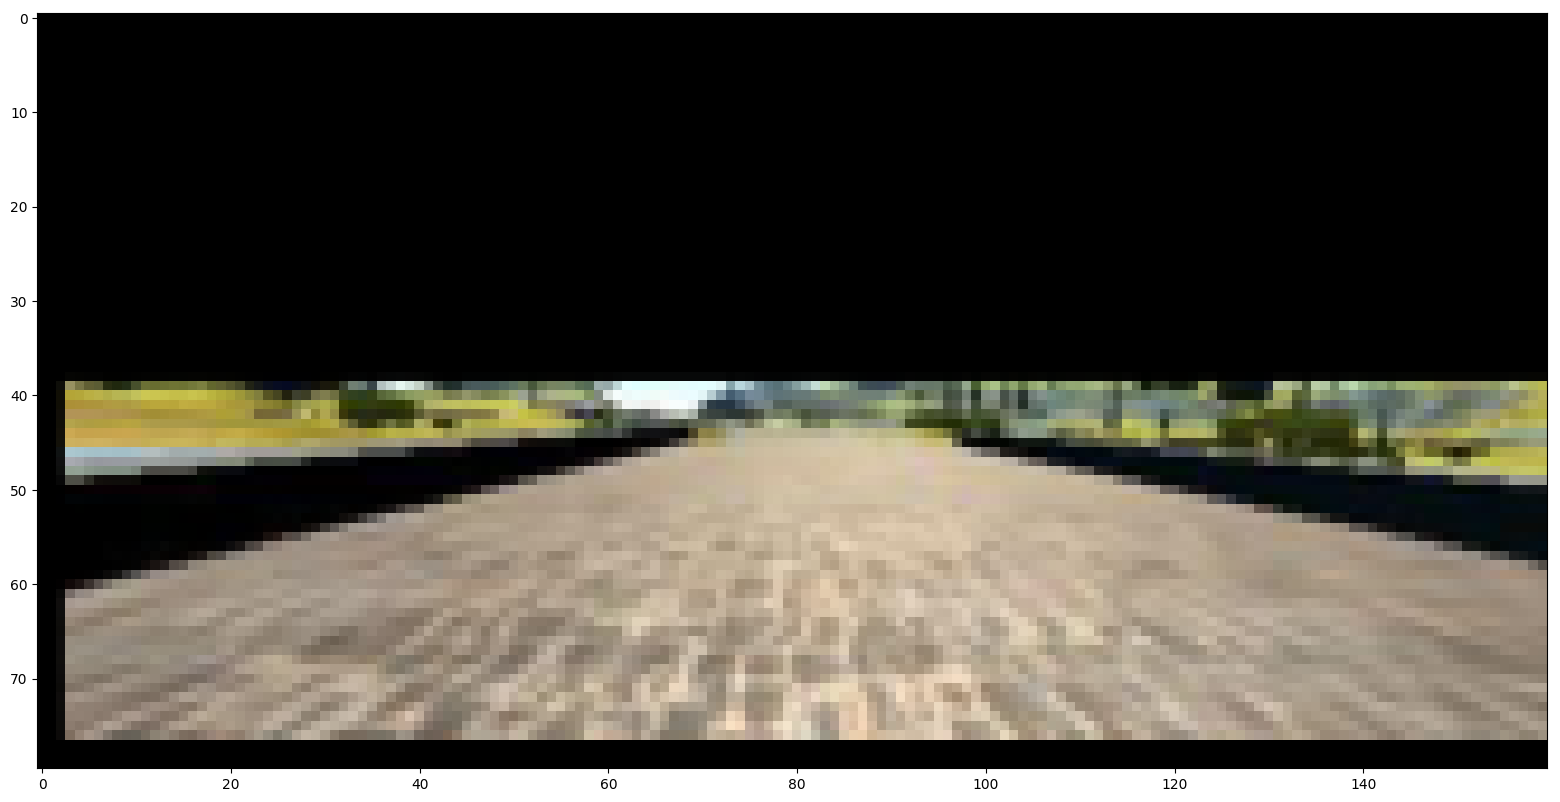

In [27]:
idx = 0
im, st = trans_image(cimages[idx], steer=steering[idx], trans_range=10)
plt.imshow(im)
steering[idx], st

In [28]:
images, image_steering = train_Generator(12).__next__()

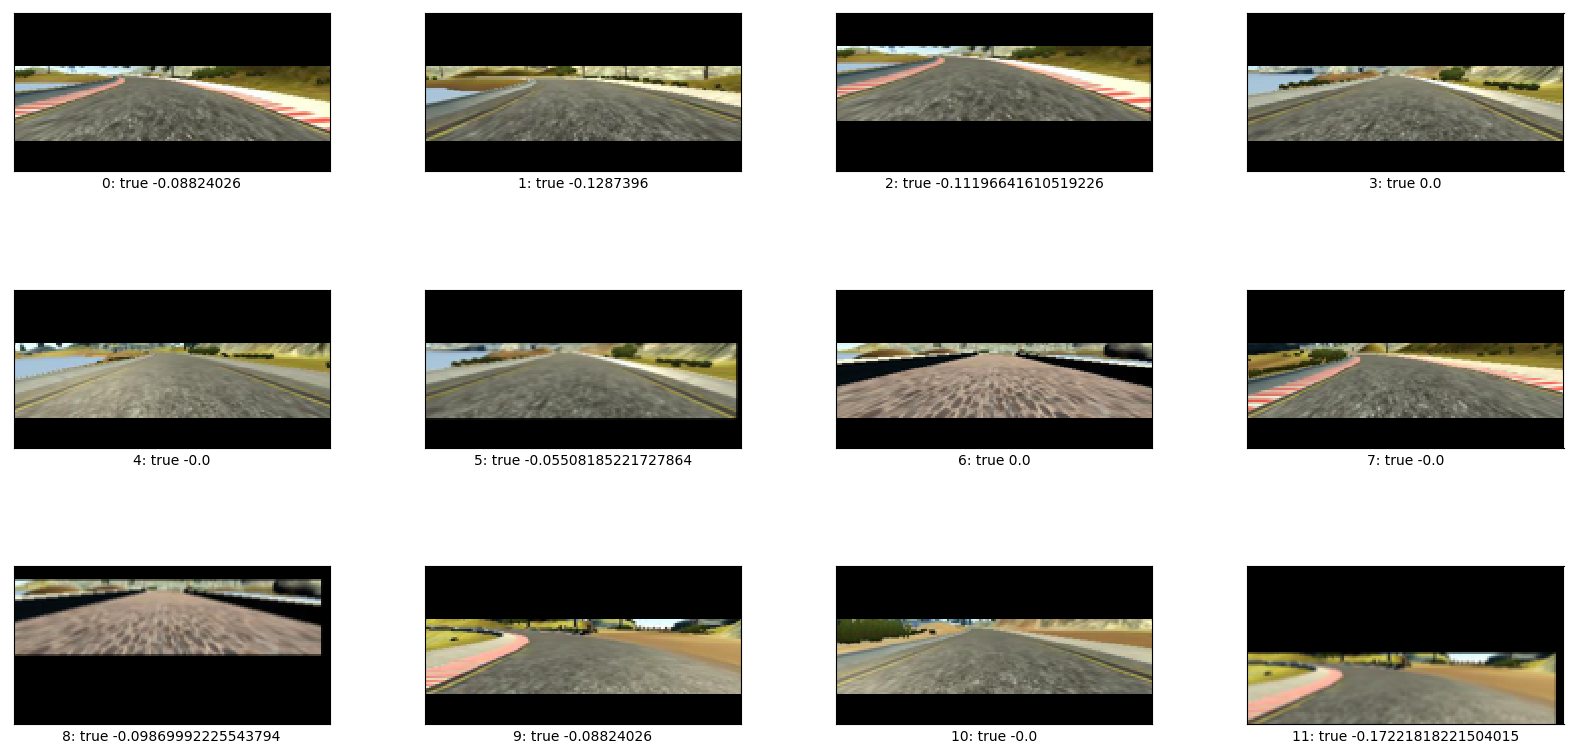

In [29]:
show_images(images, image_steering, 3, 4, random=False)

In [30]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# GPU memory. 
# intel/no parallels: 1.8gb free. 
# extra mon/no parallels: 1.2gb free. 
# clean state with extra mon and parallels 1.1gb free (50%)

In [31]:
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF

from keras.models import Sequential, model_from_json
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, ELU, Lambda
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

#def get_session(gpu_fraction=0.6):
#    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
#    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
#KTF.set_session(get_session())

Using TensorFlow backend.


In [32]:
model = Sequential()
# normalize
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=images.shape[1:], output_shape=images.shape[1:]))
# 
model.add(Conv2D(24, 5, 5, subsample=(2,2), border_mode='valid'))
model.add(Activation('relu'))
model.add(Conv2D(36, 5, 5, subsample=(2,2), border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
#
model.add(Conv2D(48, 5, 5, subsample=(2,2), border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
# 
model.add(Conv2D(64, 3, 3, border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
# 
model.add(Conv2D(64, 3, 3, border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.1)))
model.add(Activation('relu'))
#
model.add(Flatten()) 
model.add(Dense(300, activation='relu'))
model.add(Dense(10))
# output
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 80, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 78, 24)        1824      
_________________________________________________________________
activation_1 (Activation)    (None, 38, 78, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 37, 36)        21636     
_________________________________________________________________
activation_2 (Activation)    (None, 17, 37, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 17, 48)         43248     
_________________________________________________________________
activation_3 (Activation)    (None, 7, 17, 48)         0         
__________

/Users/alexeysimonov/anaconda/envs/pydata-sdc/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), padding="valid", strides=(2, 2))`
  """
/Users/alexeysimonov/anaconda/envs/pydata-sdc/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), padding="valid", strides=(2, 2))`
  import sys
/Users/alexeysimonov/anaconda/envs/pydata-sdc/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), padding="valid", strides=(2, 2))`
  if sys.path[0] == '':
/Users/alexeysimonov/anaconda/envs/pydata-sdc/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/Users/alexeysimonov/anaconda/envs/pydata-sdc/lib/python3.5/site-packages/ipykernel_launcher.py:22: UserWarning: Update you

In [33]:
learning_rate= 0.0001 #0.00001
batch_size = 64
epochs = 5
optimizer = Adam(lr=learning_rate)

In [35]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
#json_str = model.to_json()
#with open('model.json','w') as f:
#    json.dump(json_str, f)

In [37]:
history = model.fit_generator(train_Generator(batch_size), 
                              steps_per_epoch=(len(cimage_names)*3)/batch_size, 
                              nb_epoch=epochs,
                              verbose=1)

/Users/alexeysimonov/anaconda/envs/pydata-sdc/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=376.6875, verbose=1, epochs=5)`
  after removing the cwd from sys.path.


Epoch 1/5
377/376 [==============================] - 64s - loss: 0.0108 - mean_squared_error: 0.0108    
Epoch 2/5
377/376 [==============================] - 75s - loss: 0.0102 - mean_squared_error: 0.0102    
Epoch 3/5
377/376 [==============================] - 84s - loss: 0.0100 - mean_squared_error: 0.0100    
Epoch 4/5
377/376 [==============================] - 86s - loss: 0.0098 - mean_squared_error: 0.0098    
Epoch 5/5
377/376 [==============================] - 87s - loss: 0.0099 - mean_squared_error: 0.0099    


In [ ]:
# CPU. 130s/ep = 11min

In [38]:
model.save('model.h5')

In [39]:
def test_Generator(batch_size=64):
    n = 125*64#len(cimage_names)
    shape = (batch_size,)+cimages.shape[1:]
    batches = n // batch_size
    while 1:
        for i in range(batches): 
            # should be returning masked images
            idx = range((i*batch_size), ((i+1)*batch_size))
            yield cimages[idx], steering[idx]

In [40]:
#test_generator = ImageDataGenerator().flow(X = cimages, shuffle=False, batch_size=64) 

In [ ]:
predicted_angle = model.predict_generator(test_Generator(64), val_samples=124*64)

/Users/alexeysimonov/anaconda/envs/pydata-sdc/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<generator..., steps=7936)`
  """Entry point for launching an IPython kernel.


In [ ]:
r = range(0,500)
plt.plot(r, steering[r], r, predicted_angle[r]);

In [ ]:
start = 6000
r = range(start,start+500)
plt.plot(r, steering[r], r, predicted_angle[r]);

In [ ]:
STOP

In [ ]:
STOP
#model.load_weights('model.h5', by_name=False)

In [ ]:
model.save_weights('model.h5')
history = model.fit_generator(train_generator, 
                                samples_per_epoch=len(images), 
                                nb_epoch=20,
                                verbose=1)

In [ ]:
model.save_weights('model.h5')

In [ ]:
STOP

In [ ]:
with open('model.json','r') as f:
    json_str = json.load(f)
model = model_from_json(json_str)

In [ ]:
model.summary()

In [ ]:
model.load_weights('model.h5', by_name=False)